In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\suellen.silva\\Documents\\Untitled Folder'

In [7]:
movie = pd.read_csv("MovieRatings.csv")

In [8]:
len(movie)

559

In [10]:
movie.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [11]:
movie.columns = ['film', 'genre', 'criticrating', 'audienceratings', 'budget', 'year']

In [12]:
movie.head()

,film,genre,criticrating,audienceratings,budget,year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
film               559 non-null object
genre              559 non-null object
criticrating       559 non-null int64
audienceratings    559 non-null int64
budget             559 non-null int64
year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [15]:
movie.describe()

,criticrating,audienceratings,budget,year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [18]:
#transformando ano em fator
movie.film = movie.film.astype('category')
movie.genre = movie.genre.astype('category')
movie.year = movie.year.astype('category')

In [19]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
film               559 non-null category
genre              559 non-null category
criticrating       559 non-null int64
audienceratings    559 non-null int64
budget             559 non-null int64
year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [22]:
movie.genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [23]:
movie.describe()

,criticrating,audienceratings,budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [24]:
#----

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
#Jointplots

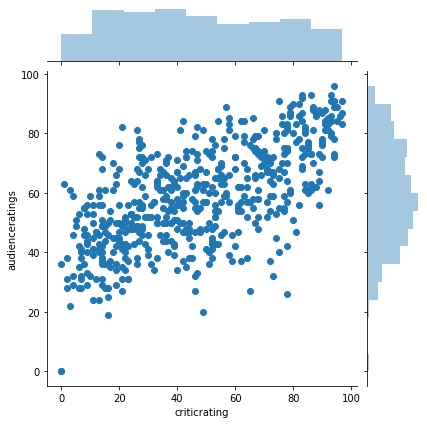

In [30]:
j = sns.jointplot(data=movie, x='criticrating', y='audienceratings')

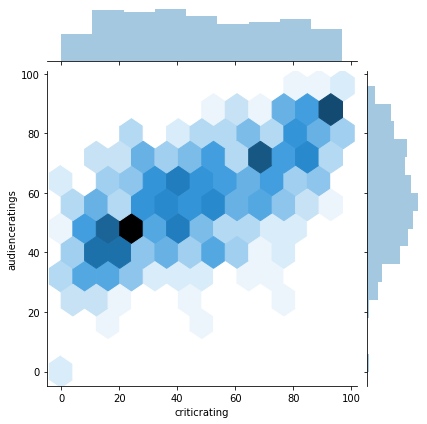

In [31]:
j = sns.jointplot(data=movie, x='criticrating', y='audienceratings', kind = 'hex') #identify clusters

In [32]:
# Chart1

In [34]:
#---

In [35]:
#Histograms

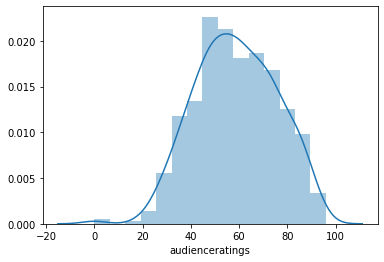

In [39]:
m1 = sns.distplot(movie.audienceratings, bins=15)

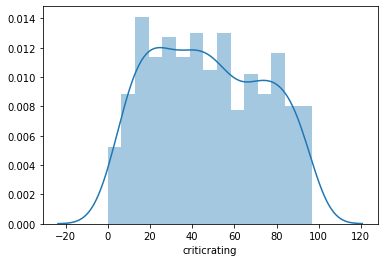

In [40]:
m2 = sns.distplot(movie.criticrating, bins=15)

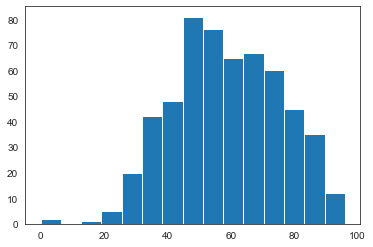

In [43]:
sns.set_style('white')
n1 = plt.hist(movie.audienceratings, bins=15)

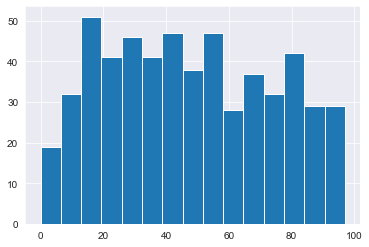

In [45]:
sns.set_style('darkgrid')
n2 = plt.hist(movie.criticrating, bins=15)

In [46]:
#---

In [47]:
#Stacked Histograms

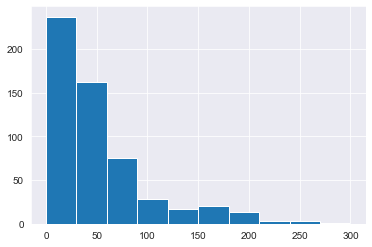

In [49]:
h1 = plt.hist(movie.budget)

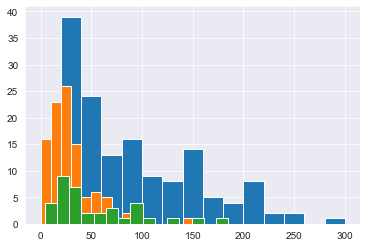

In [57]:
plt.hist(movie[movie.genre == 'Action'].budget, bins=15)
plt.hist(movie[movie.genre == 'Drama'].budget, bins=15)
plt.hist(movie[movie.genre == 'Thriller'].budget, bins=15)
plt.show()

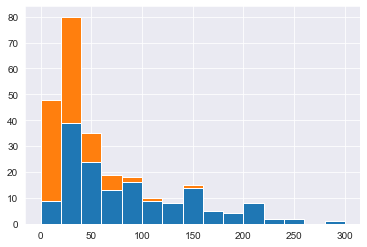

In [62]:
plt.hist([movie[movie.genre=='Action'].budget, movie[movie.genre=='Drama'].budget], stacked=True, bins=15)
plt.show()

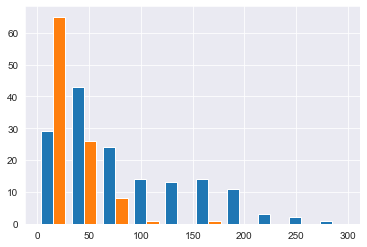

In [64]:
plt.hist([movie[movie.genre=='Action'].budget, movie[movie.genre=='Drama'].budget])
plt.show()

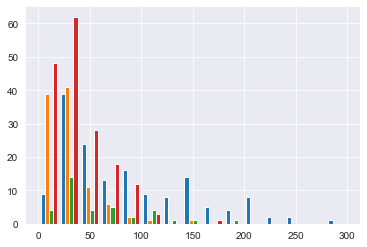

In [69]:
plt.hist([movie[movie.genre=='Action'].budget, \
          movie[movie.genre=='Drama'].budget, \
          movie[movie.genre=='Thriller'].budget, \
          movie[movie.genre=='Comedy'].budget], \
          bins=15)
plt.show()

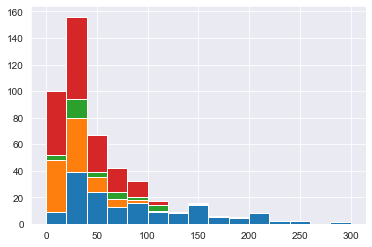

In [70]:
plt.hist([movie[movie.genre=='Action'].budget, \
          movie[movie.genre=='Drama'].budget, \
          movie[movie.genre=='Thriller'].budget, \
          movie[movie.genre=='Comedy'].budget], \
          bins=15, stacked=True)
plt.show()

In [75]:
for gen in movie.genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


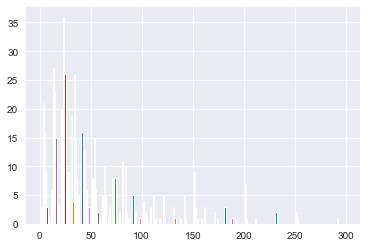

In [77]:
list1 = list()
for gen in movie.genre.cat.categories:
    list1.append(movie[movie.genre==gen].budget)
h=plt.hist(list1, bins=30)

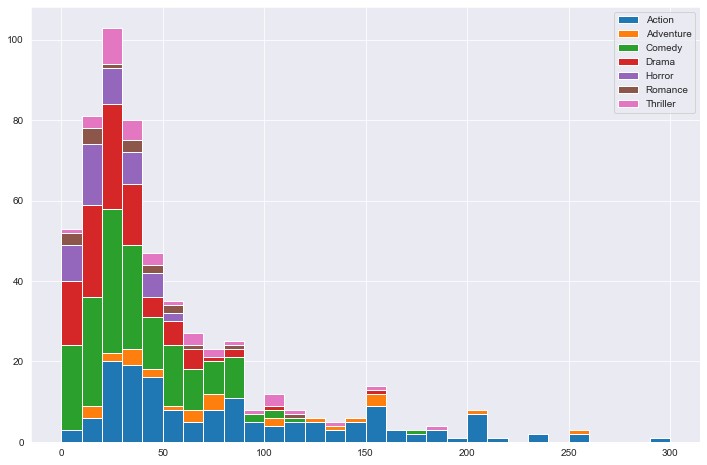

In [82]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

list1 = list()
mylabels = list()
for gen in movie.genre.cat.categories:
    list1.append(movie[movie.genre==gen].budget)
    mylabels.append(gen)
h=plt.hist(list1, bins=30, stacked=30, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [83]:
#---

In [84]:
#KDE plot

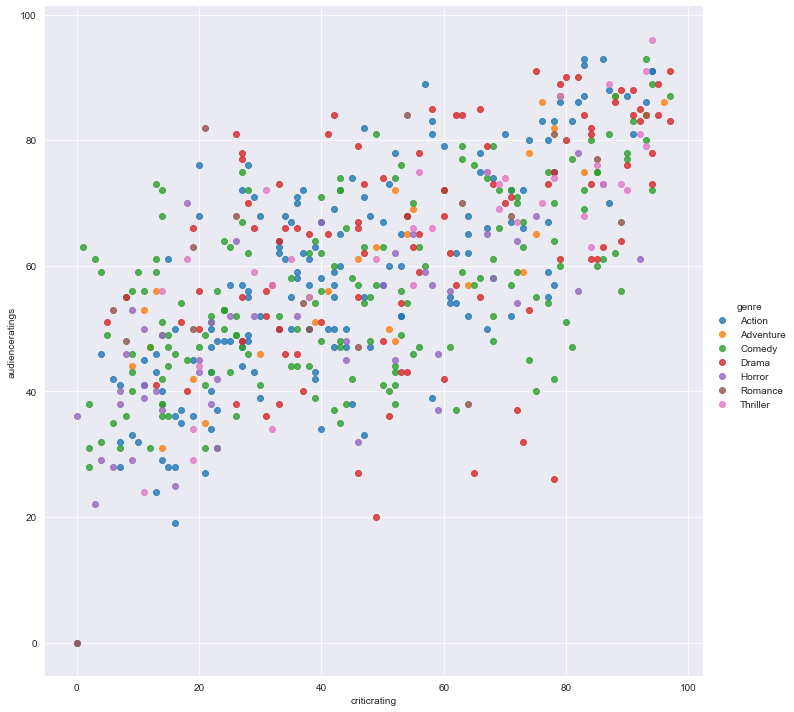

In [94]:
vis1 = sns.lmplot(data=movie, x='criticrating', y='audienceratings', hue ='genre', size=10, aspect=1, fit_reg=False)

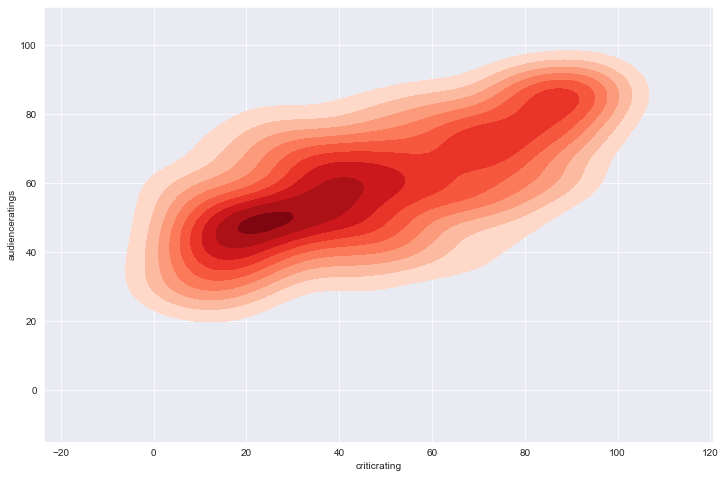

In [103]:
k1 = sns.kdeplot(movie.criticrating, movie.audienceratings, shade=True, shade_lowest=False, cmap='Reds')

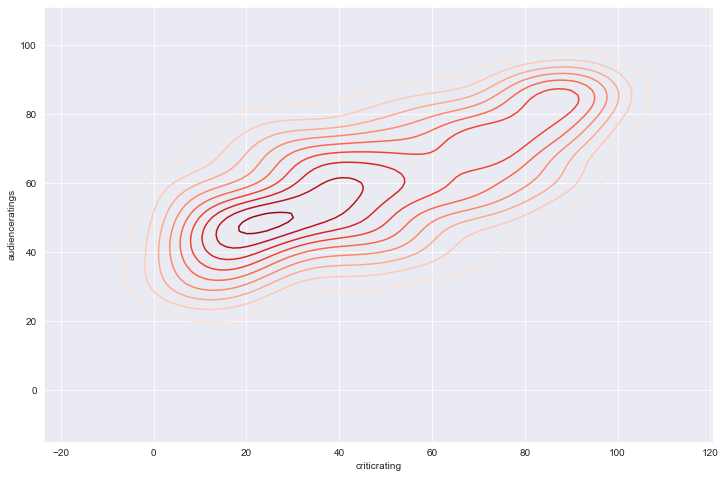

In [104]:
k1b = sns.kdeplot(movie.criticrating, movie.audienceratings, cmap='Reds')

In [105]:
# working with subplots()

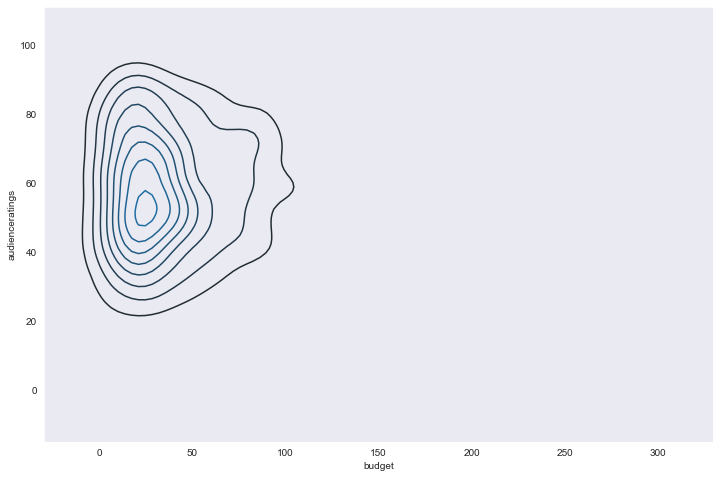

In [108]:
sns.set_style('dark')
k1 = sns.kdeplot(movie.budget, movie.audienceratings)

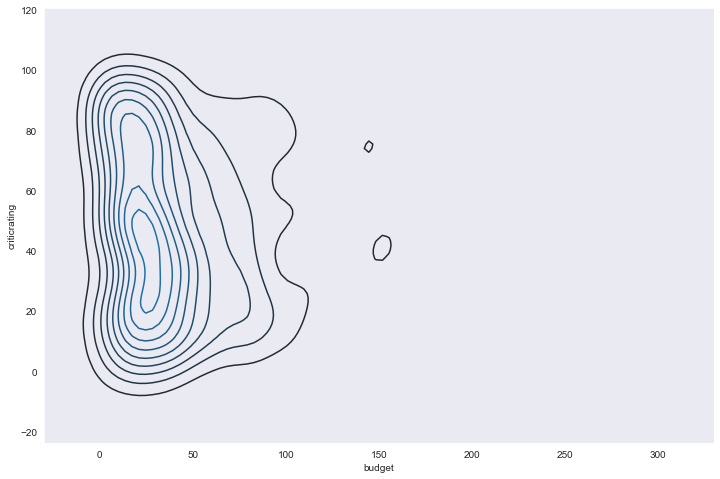

In [114]:
k2= sns.kdeplot(movie.budget, movie.criticrating)

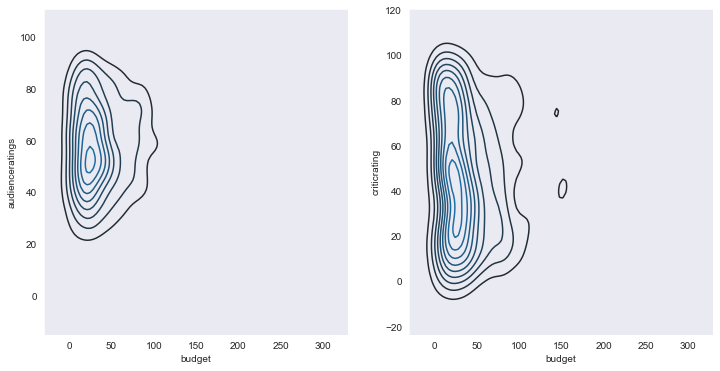

In [117]:
f, axes = plt.subplots(1,2, figsize= (12,6))
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0])
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[1])

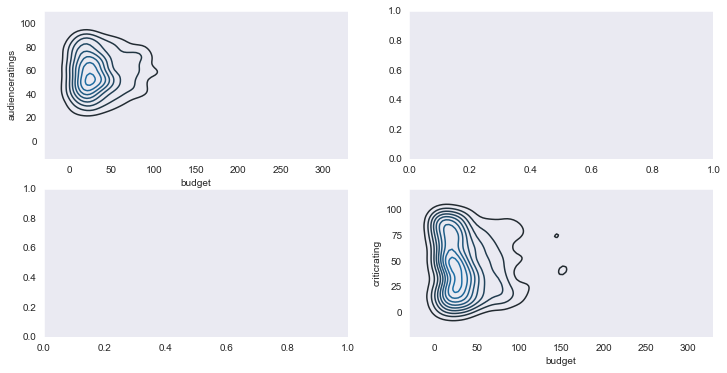

In [118]:
f, axes = plt.subplots(2,2, figsize= (12,6))
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0,0])
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[1,1])


[(-20, 160)]

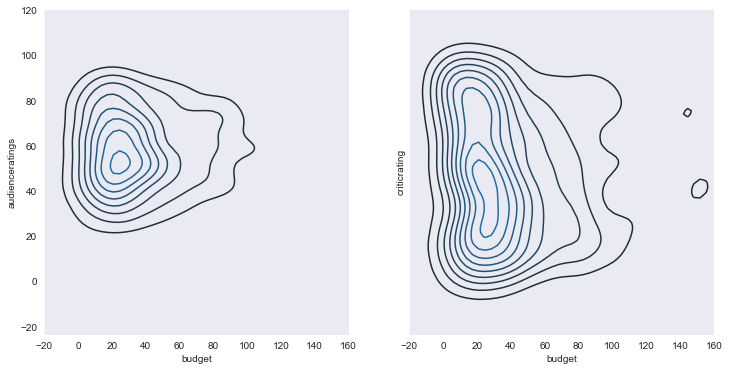

In [121]:
#Modificar o limites x e y para ambos os gráficos
f, axes = plt.subplots(1,2, figsize= (12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0])
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[1])
k1.set(xlim=(-20, 160))

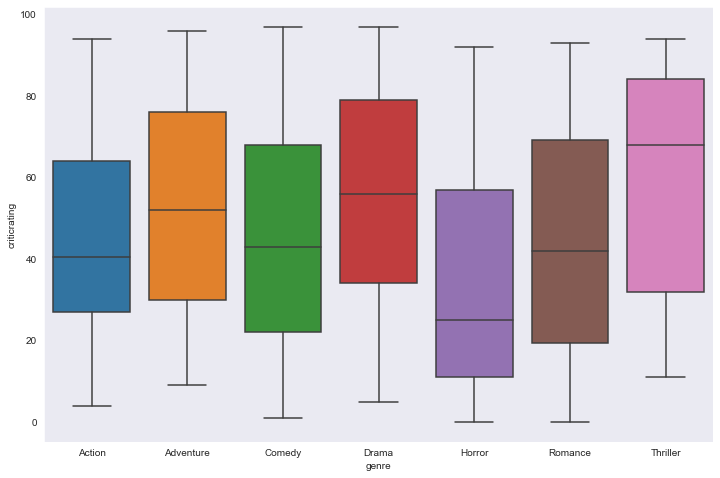

In [125]:
z = sns.boxplot(data=movie, x='genre', y='criticrating')

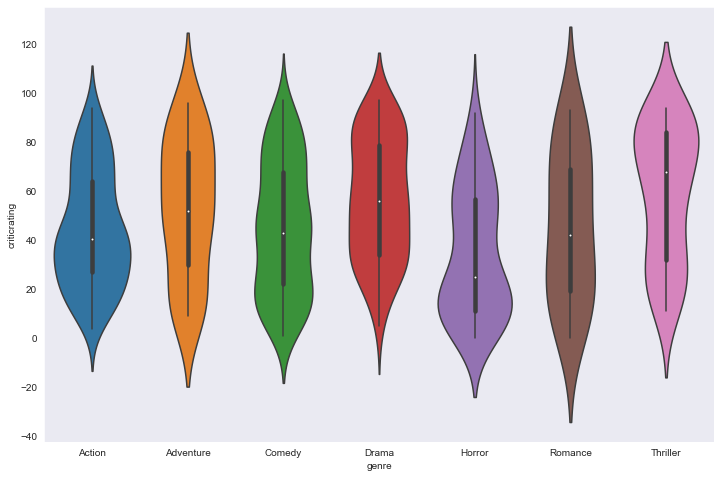

In [126]:
z = sns.violinplot(data=movie, x='genre', y='criticrating')

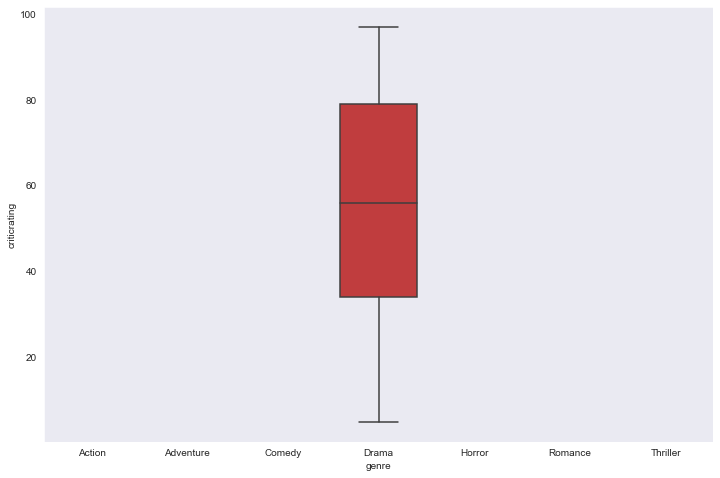

In [130]:
z = sns.boxplot(data=movie[movie.genre=='Drama'], x='genre', y='criticrating')

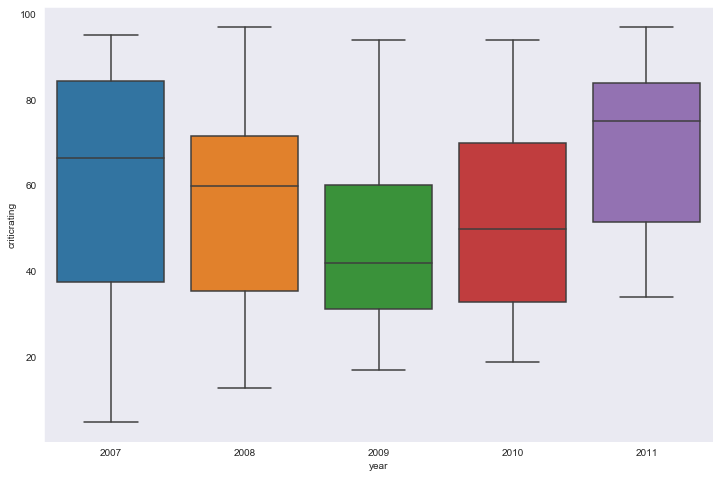

In [131]:
z = sns.boxplot(data=movie[movie.genre=='Drama'], x='year', y='criticrating')

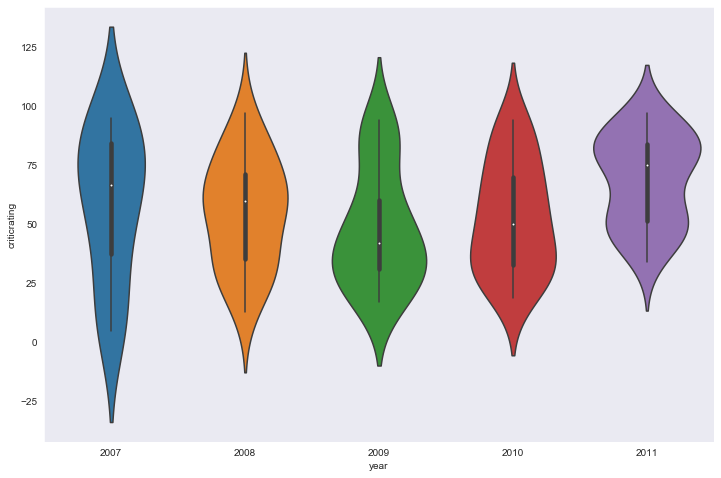

In [132]:
z = sns.violinplot(data=movie[movie.genre=='Drama'], x='year', y='criticrating')

In [133]:
#---

In [134]:
#Facet Grid

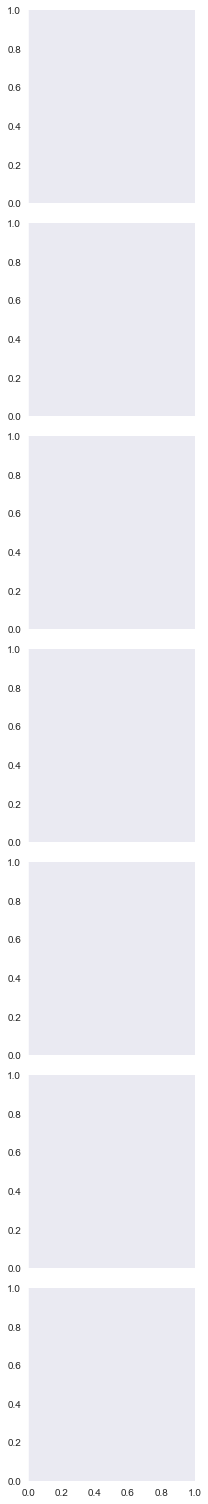

In [135]:
q = sns.FacetGrid(movie, row='genre', hue='genre')

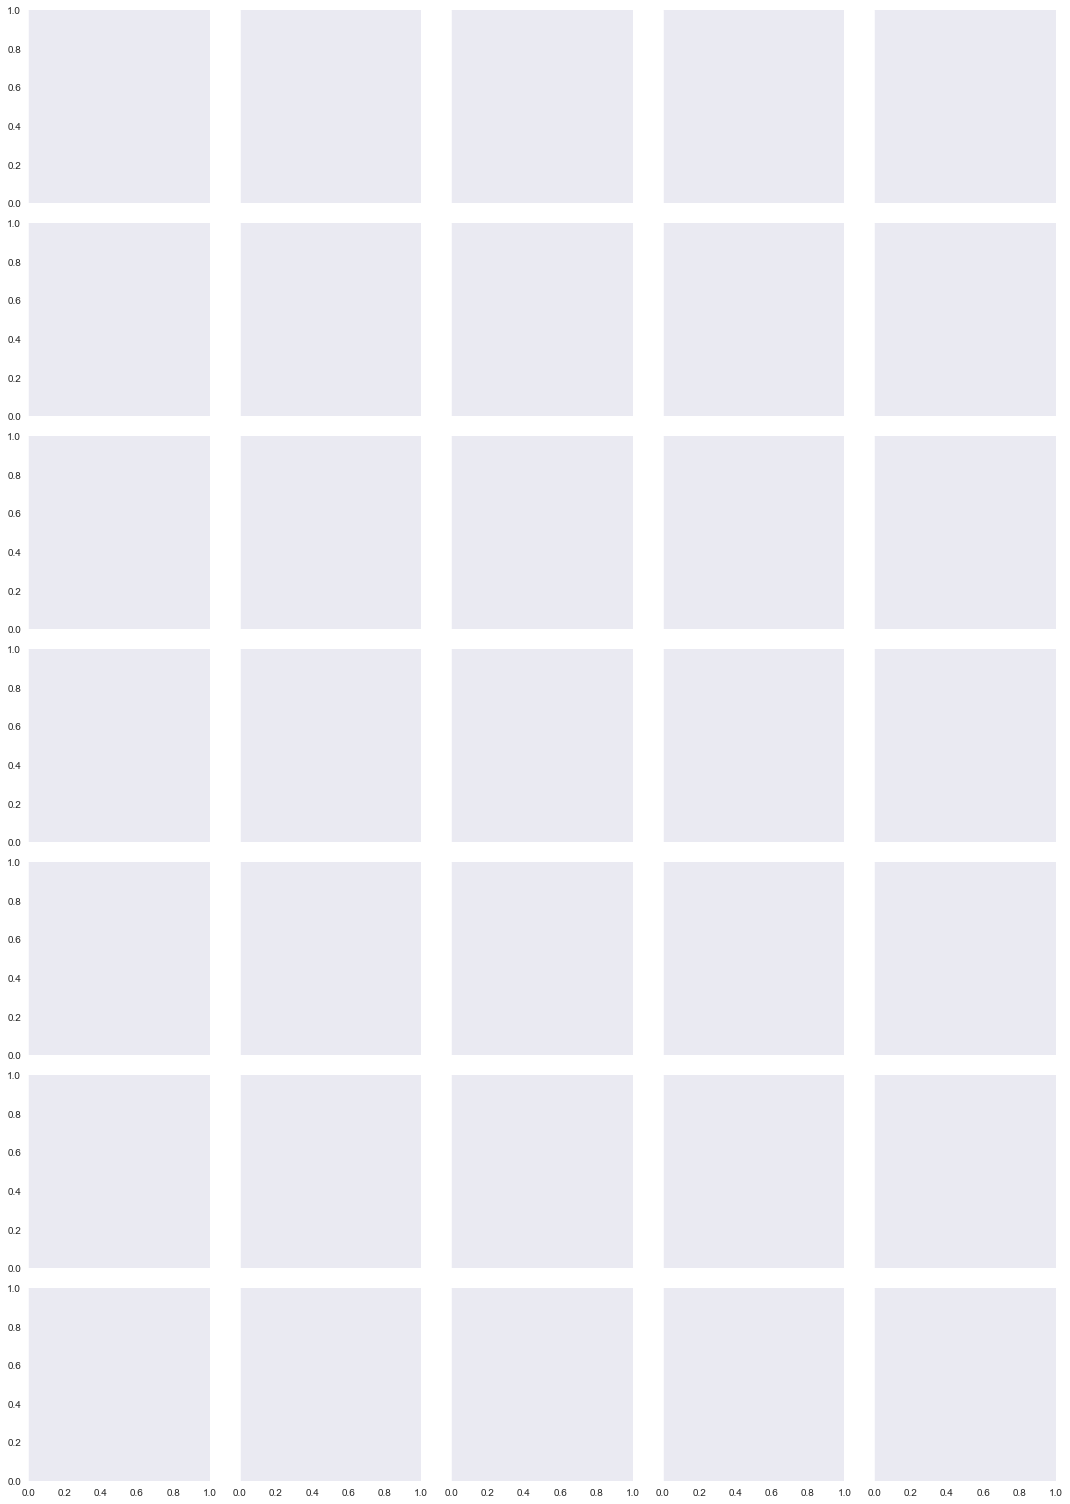

In [136]:
q = sns.FacetGrid(movie, row='genre', hue='genre', col='year')

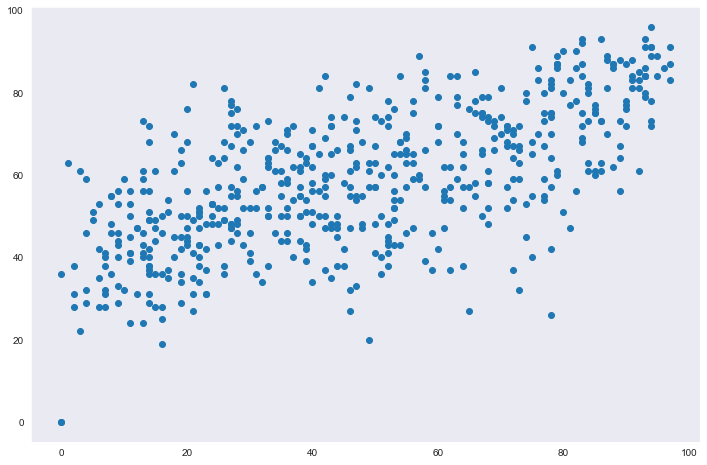

In [137]:
plt.scatter(movie.criticrating, movie.audienceratings)

In [138]:
g = g.map(plt.scatter, movie.criticrating, movie.audienceratings) #só funciona com o grade


NameError: name 'g' is not defined

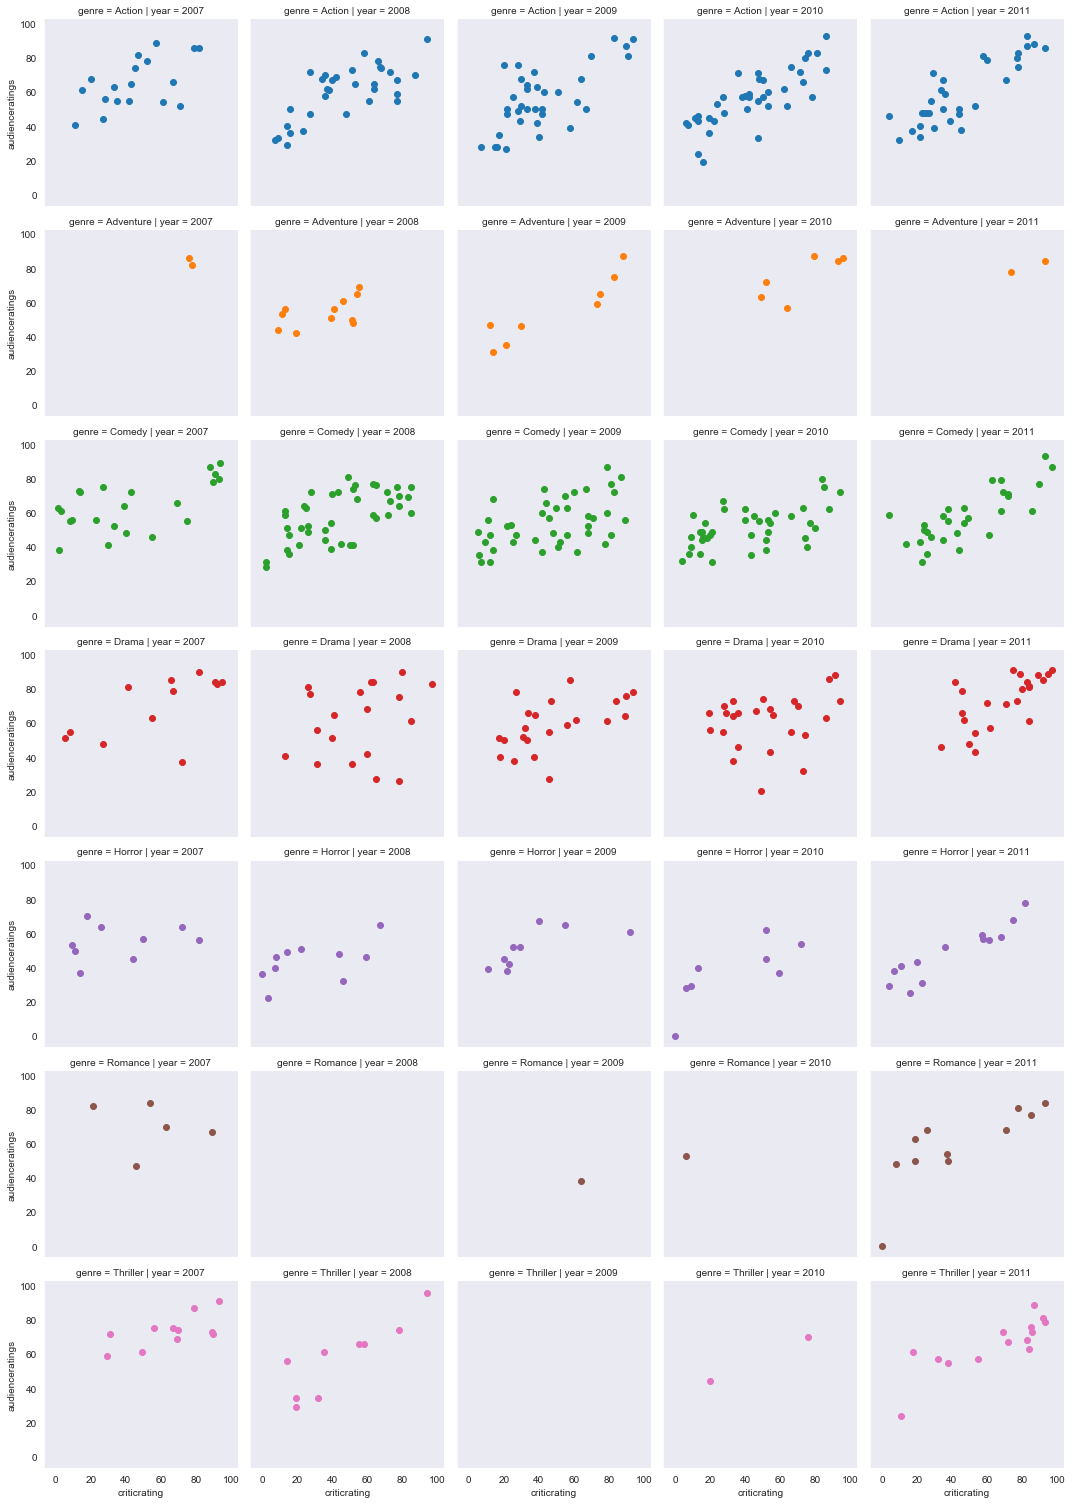

In [141]:
g = sns.FacetGrid(movie, row='genre', hue='genre', col='year')
g = g.map(plt.scatter, 'criticrating', 'audienceratings') 


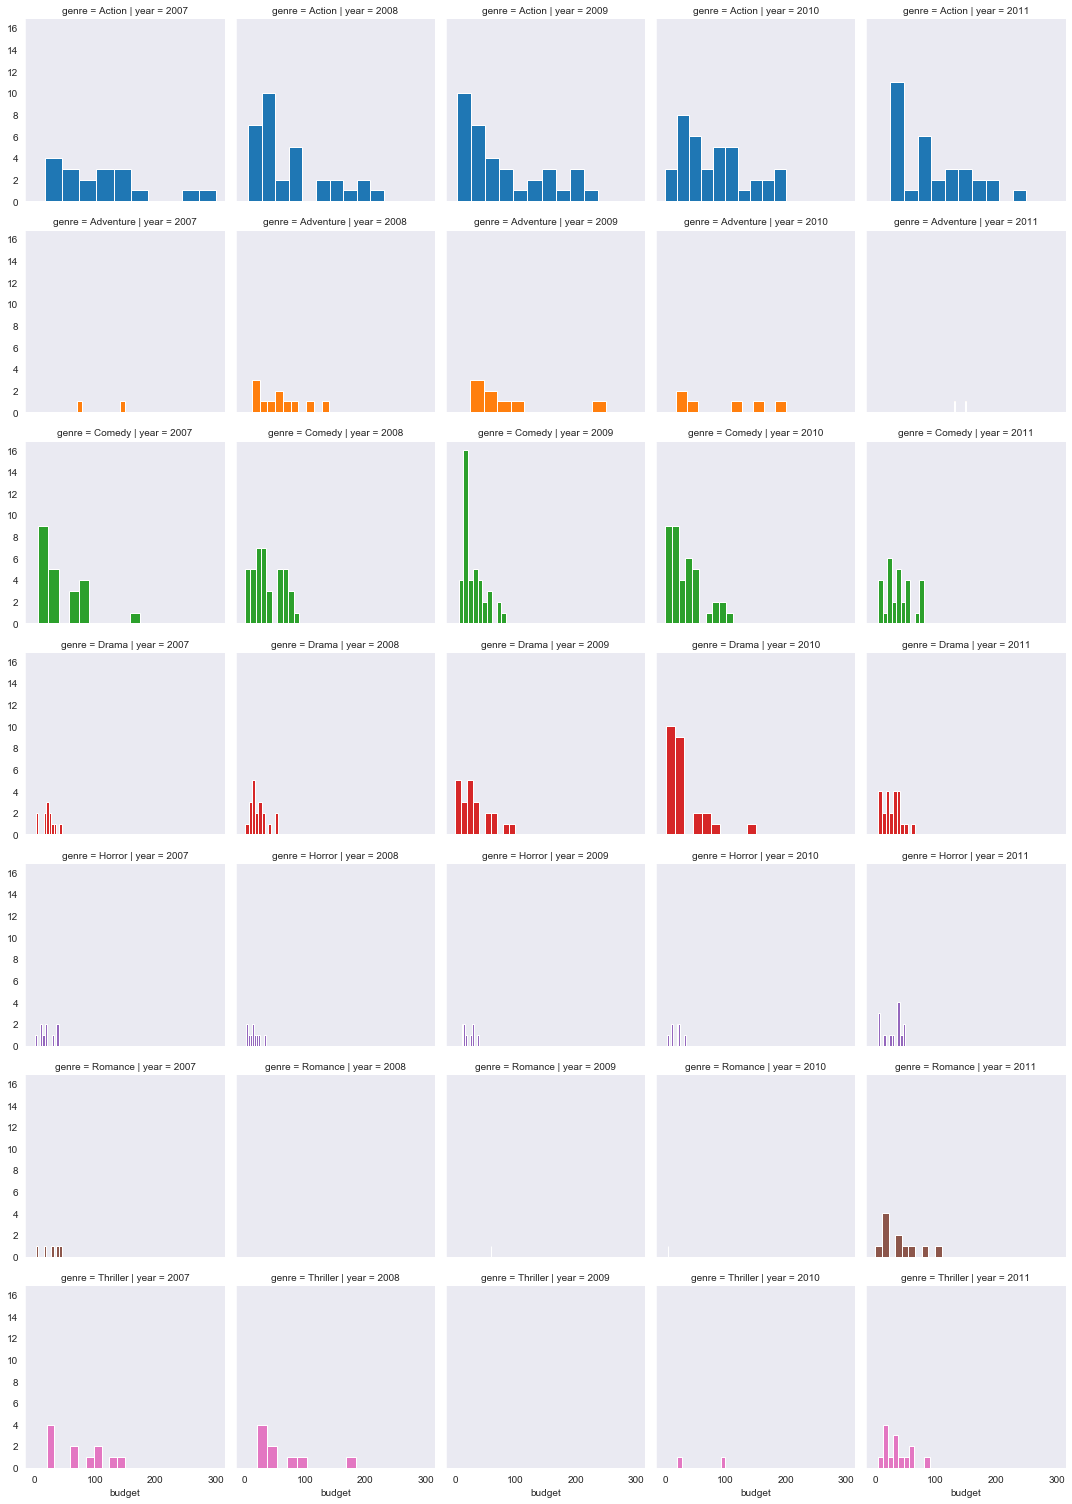

In [143]:
g = sns.FacetGrid(movie, row='genre', hue='genre', col='year')
g = g.map(plt.hist,'budget') 

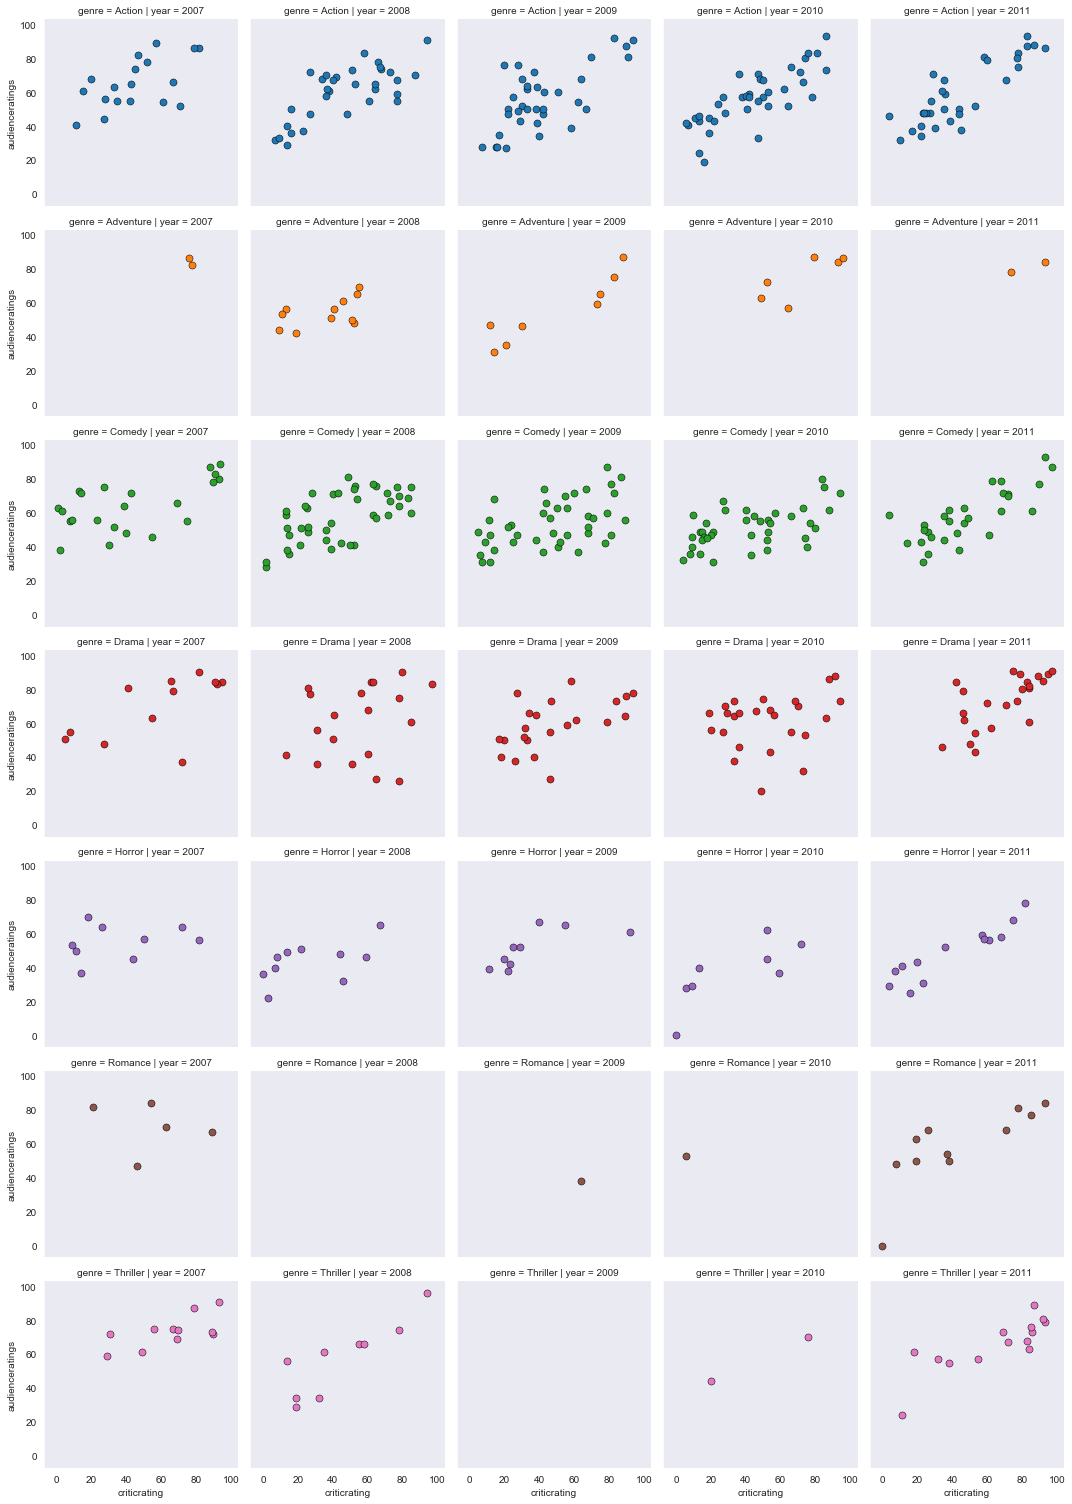

In [147]:
g = sns.FacetGrid(movie, row='genre', hue='genre', col='year')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'criticrating', 'audienceratings', **kws) 

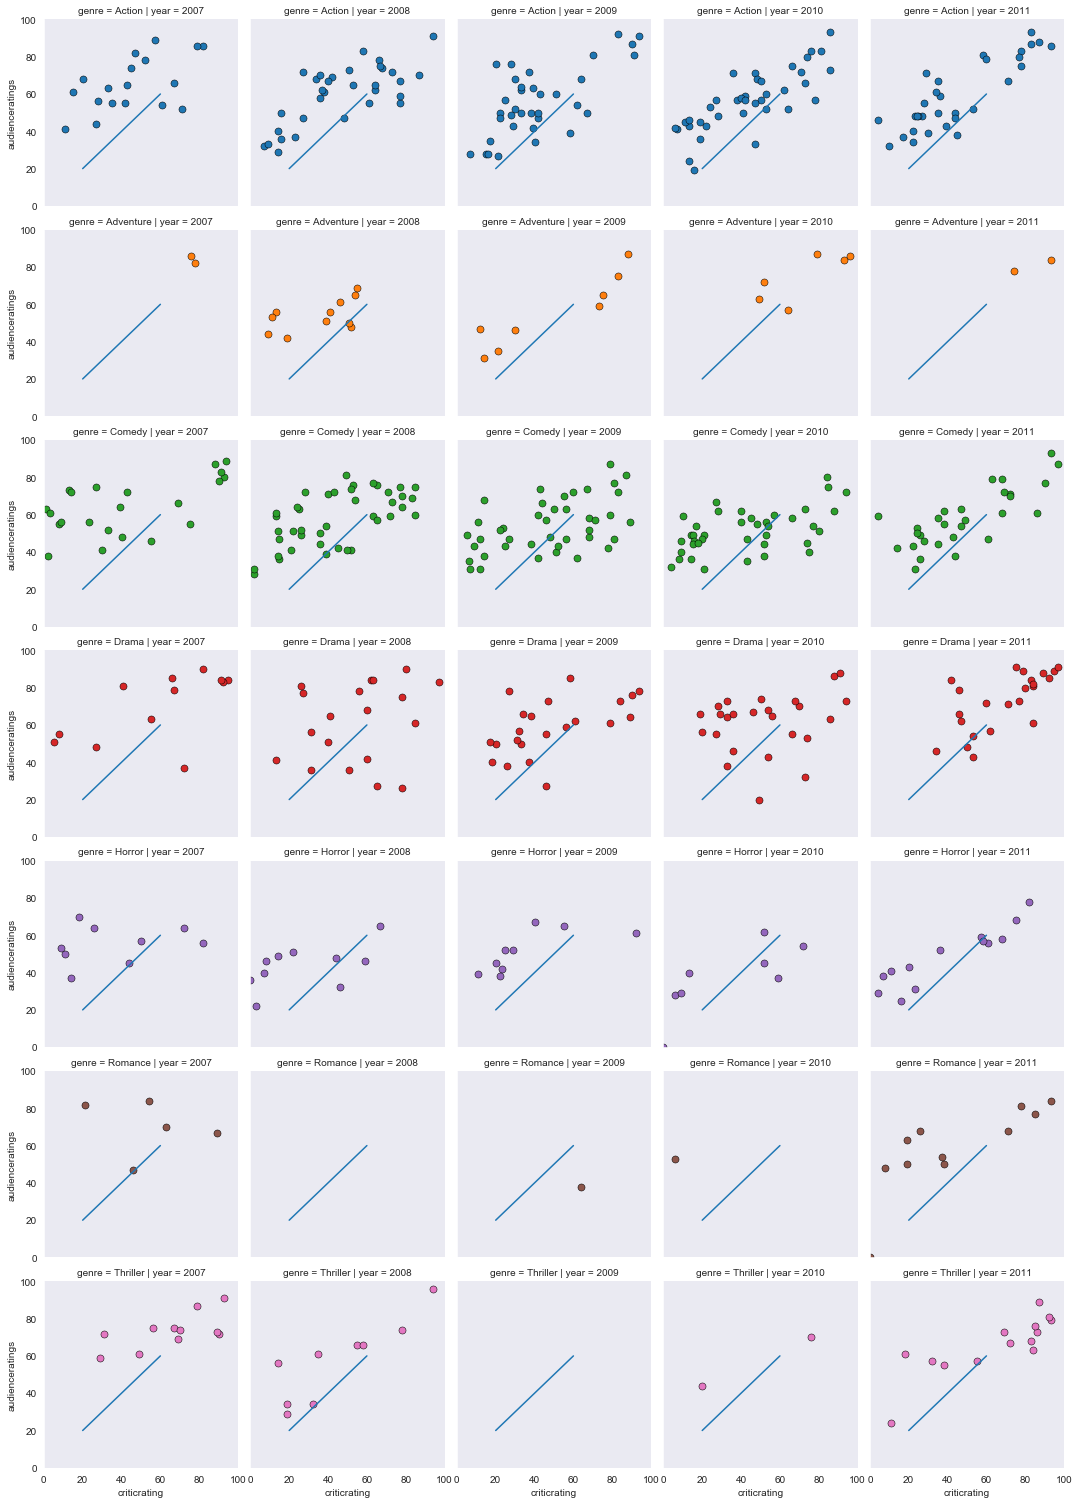

In [150]:
#controlling azes and adding diagonals
g = sns.FacetGrid(movie, row='genre', hue='genre', col='year')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'criticrating', 'audienceratings', **kws) 
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((20,60), (20,60))

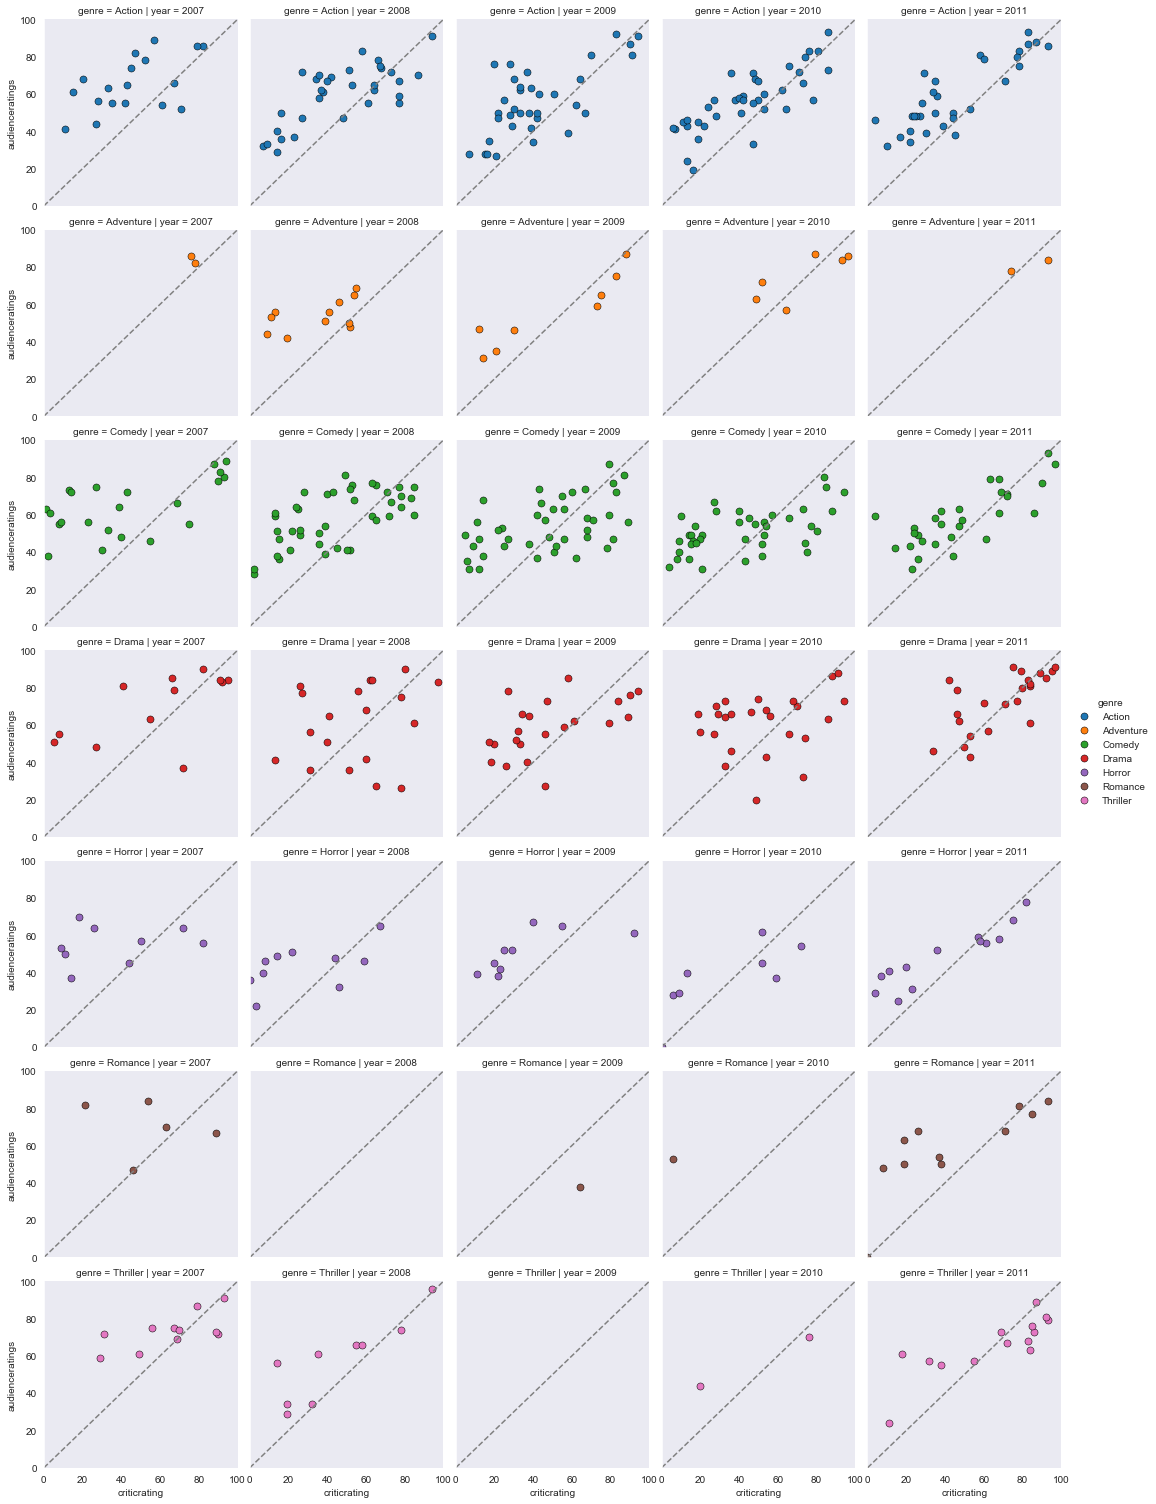

In [153]:
g = sns.FacetGrid(movie, row='genre', hue='genre', col='year')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'criticrating', 'audienceratings', **kws) 
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

In [154]:
#---

In [155]:
#Building dashboards

In [156]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

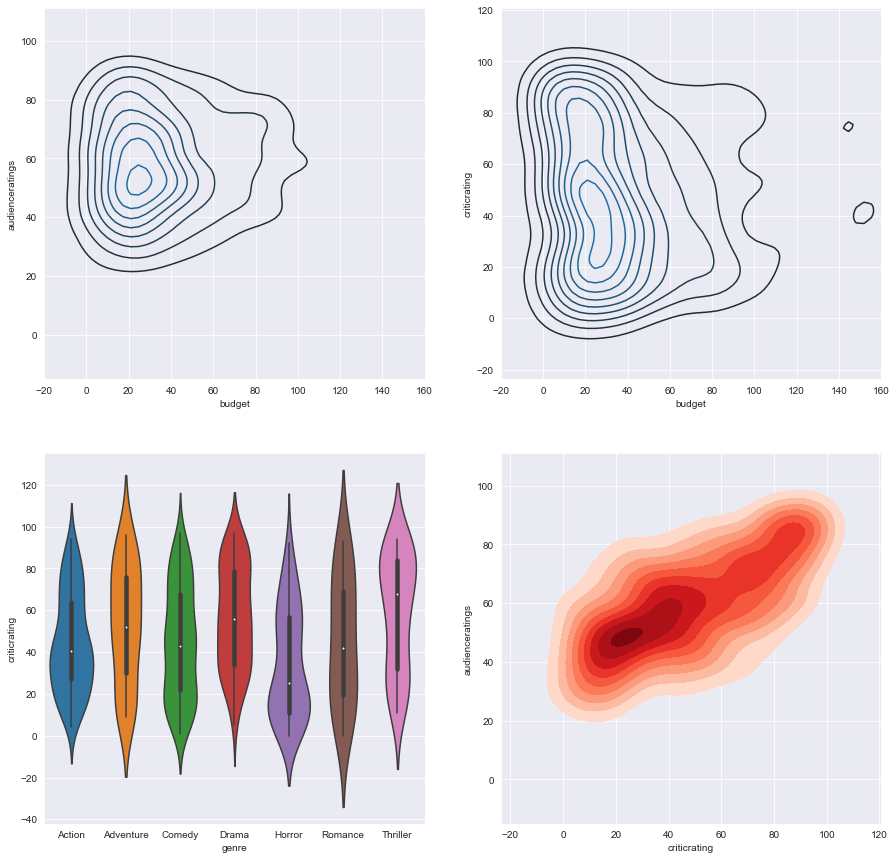

In [164]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0, 0])
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z = sns.violinplot(data=movie, x='genre', y='criticrating', ax=axes[1,0])
k3 = sns.kdeplot(movie.criticrating, movie.audienceratings, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])


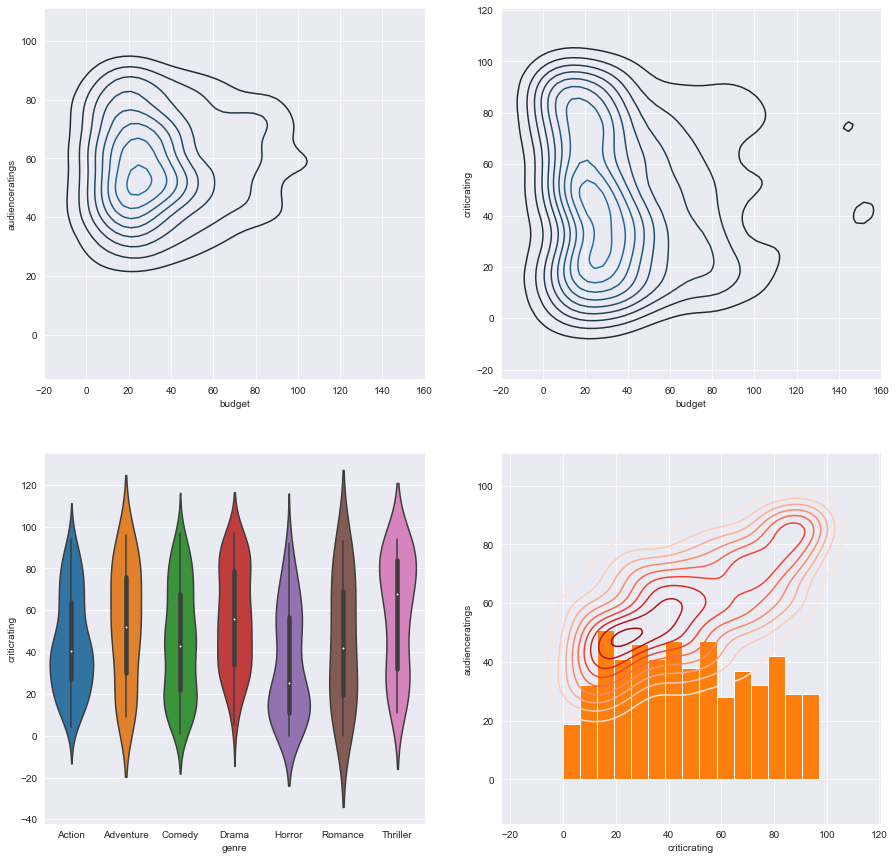

In [173]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0, 0])
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[0,1])
z = sns.violinplot(data=movie, x='genre', y='criticrating', ax=axes[1,0])
#k3 = sns.kdeplot(movie.criticrating, movie.audienceratings, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k3b = sns.kdeplot(movie.criticrating, movie.audienceratings, cmap='Reds', ax=axes[1,1])
axes[1,1].hist(movie.criticrating, bins=15)
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

In [174]:
#Styling Dashboards

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

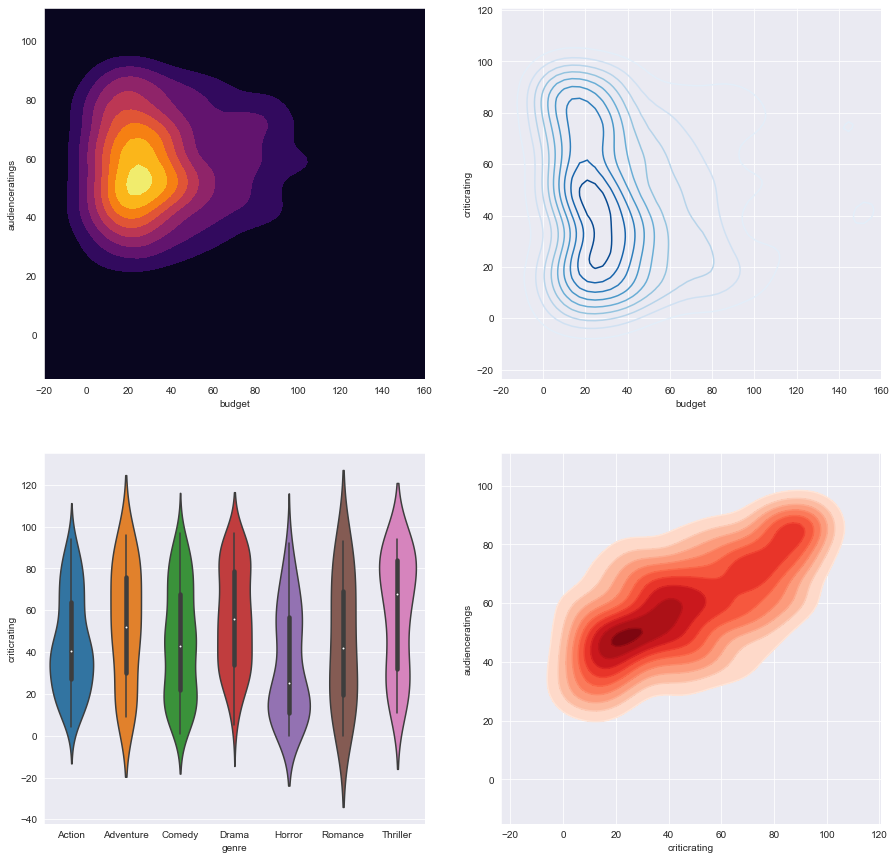

In [178]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0, 0], shade=True, shade_lowest=True, cmap='inferno')
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[0,1], cmap='Blues')
z = sns.violinplot(data=movie, x='genre', y='criticrating', ax=axes[1,0])
k3 = sns.kdeplot(movie.criticrating, movie.audienceratings, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k3b = sns.kdeplot(movie.criticrating, movie.audienceratings, cmap='Reds', ax=axes[1,1])
#axes[1,1].hist(movie.criticrating, bins=15)
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

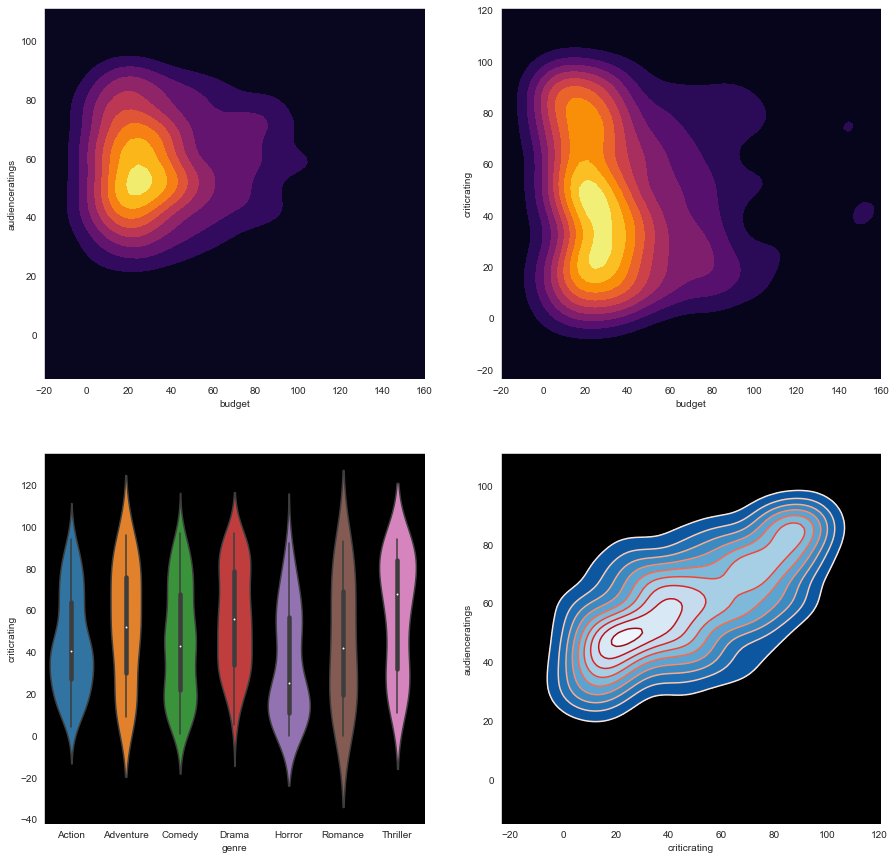

In [186]:
sns.set_style('dark', {"axes.facecolor":"black"}) #white, whitegrid. dark, darkgrid..
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movie.budget, movie.audienceratings, ax=axes[0, 0], shade=True, shade_lowest=True, cmap='inferno')
k2 = sns.kdeplot(movie.budget, movie.criticrating, ax=axes[0,1], shade=True, shade_lowest=True,cmap='inferno')
z = sns.violinplot(data=movie, x='genre', y='criticrating', ax=axes[1,0])
k3 = sns.kdeplot(movie.criticrating, movie.audienceratings, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k3b = sns.kdeplot(movie.criticrating, movie.audienceratings, cmap='Reds', ax=axes[1,1])
#axes[1,1].hist(movie.criticrating, bins=15)
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

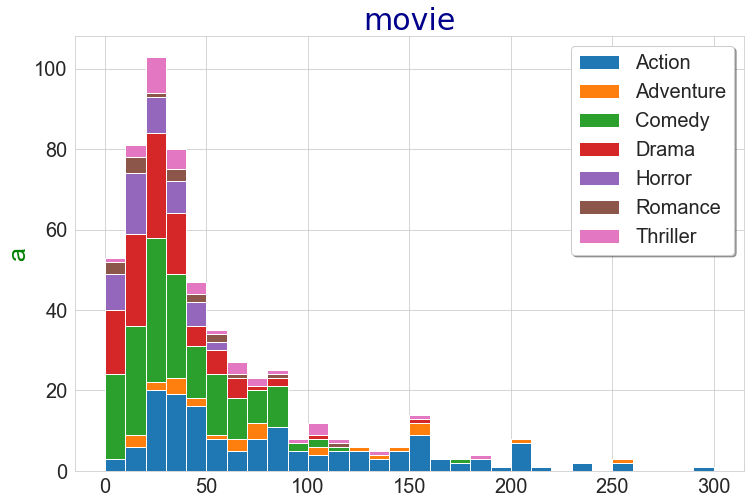

In [198]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8
sns.set_style('whitegrid')
list1 = list()
mylabels = list()
for gen in movie.genre.cat.categories:
    list1.append(movie[movie.genre==gen].budget)
    mylabels.append(gen)
h=plt.hist(list1, bins=30, stacked=30, rwidth=1, label=mylabels)
plt.title("movie", fontsize=30, color="DarkBlue", fontname="Console")
plt.ylabel("a", fontsize=25, color="green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':20})
plt.show()